In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

## Data simulation

A large part of our job as data analysts in a mobile game company like King consists of analysing data from people playing the game. We call this **post-hoc analysis**. However, when you are designing a new game, we don't have any real data to look at! How do we know if the game is designed properly? Is it too easy or too hard? Are we giving away too many or too few boosters? Does the game have enough levels to keep the players busy until we have new content? If we wait for real data to answer these questions, we are too late and will have already lost players. So how do we answer these questions, before the game is released to players? That is when we rely on **data simulation**.

According to Wikipedia, simulation is "an approximate imitation of the operation of a process or system". In this case, we are imitating how players would play our game. In order to do so, we need to determine how the system (in this case, the game) works, and we need to make some assumptions about how players would interact with it. 

### Bernoulli distribution

As you'll know, almost all King games consist of a long sequence of levels that need to be completed in order. Let's keep this exercise in data simulation simple, focusing on a single level only. Every time a player attempts the level, there's only two possible outcomes: either the player wins the level, or they lose the level. An experiment with only two possible outcomes is modelled using a distribution named after the Swiss mathematician Jacob Bernoulli. 

Wait, what is a distribution again? A probability distribution indicates how likely it is for each possible outcome to happen. You probably remember the bell curve, or the normal distribution. The centre part of the bell indicates the most likely outcome, whereas the outcomes on the extreme ends of the curve are very unlikely to happen. By changing the **parameters** of the normal distribution (the mean and standard deviation), we change the shape of the bell curve and as such we change the likeliness of each outcome.

Text(10, 0.4, 'Std. Dev: 3')

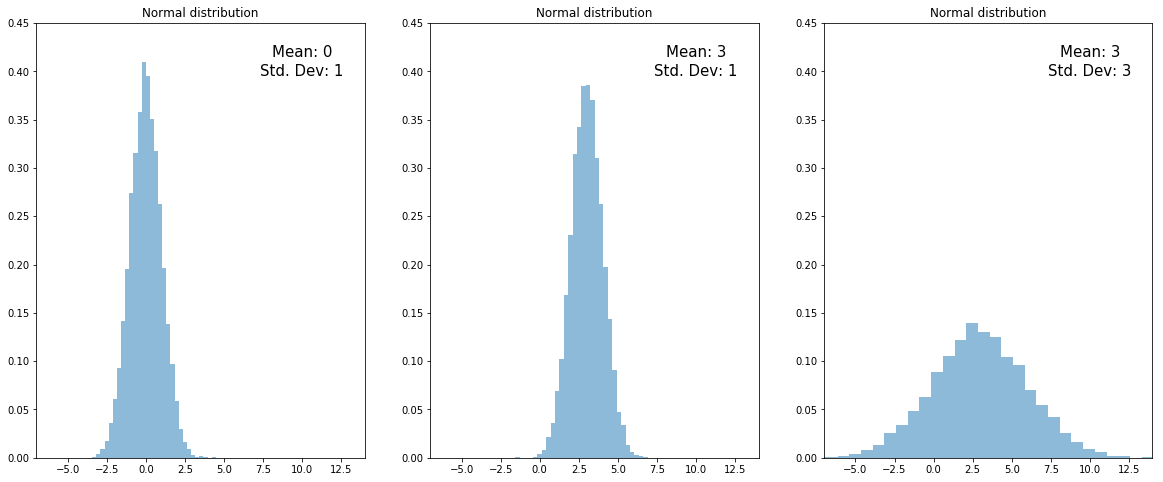

In [2]:
# @hidden_cell

plt.figure(figsize=(20, 8))
plt.subplot(1, 3, 1)
plt.xlim((-7,14))
plt.ylim((0,0.45))
count1, bins1, ignored1 = plt.hist(np.random.normal(0, 1, 10000), 30, density=True,alpha=0.5)
plt.title("Normal distribution")
plt.text(10, 0.42, "Mean: 0", ha="center", va="center",size=15)
plt.text(10, 0.40, "Std. Dev: 1", ha="center", va="center",size=15)
plt.subplot(1, 3, 2)
plt.xlim((-7,14))
plt.ylim((0,0.45))
count2, bins2, ignored2 = plt.hist(np.random.normal(3, 1, 10000), 30, density=True,alpha=0.5)
plt.title("Normal distribution")
plt.text(10, 0.42, "Mean: 3", ha="center", va="center",size=15)
plt.text(10, 0.40, "Std. Dev: 1", ha="center", va="center",size=15)
plt.subplot(1, 3, 3)
plt.xlim((-7,14))
plt.ylim((0,0.45))
count3, bins3, ignored3 = plt.hist(np.random.normal(3, 3, 10000), 30, density=True,alpha=0.5)
plt.title("Normal distribution")
plt.text(10, 0.42, "Mean: 3", ha="center", va="center",size=15)
plt.text(10, 0.40, "Std. Dev: 3", ha="center", va="center",size=15)

Similarly, we can create a probability distribution for the Bernoulli distribution. This will look much simpler though, as a Bernoulli distribution has only two possible outcomes! These two outcomes are indicated by 0 (failure) and 1 (success), but you can give them any interpretation you like. For example, we assign the value 0 when the player loses the gameround, and we assign the value 1 when the player wins the gameround. 

The normal distribution has two parameters, the mean (the centre of the distribution) and the standard deviation (how wide the distribution is). The Bernoulli distribution, however, has only one parameter. We call this parameter the probability of success, and it is usually denoted by the letter *p*.

Text(0.9, 1.5, 'p: 0.6')

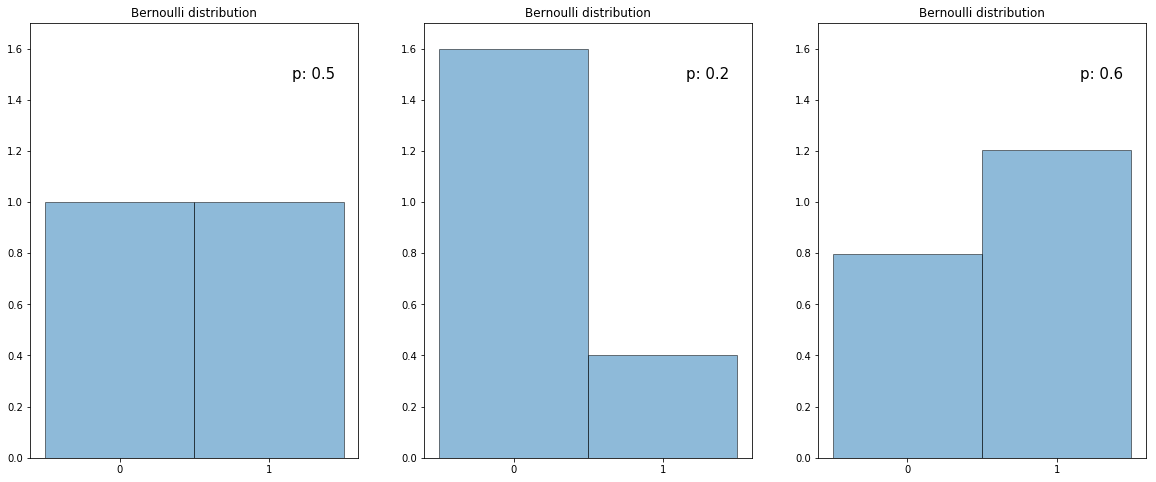

In [3]:
# @hidden_cell

plt.figure(figsize=(20, 8))
plt.subplot(1, 3, 1)
plt.ylim((0,1.7))
plt.xticks([0.25,0.75],('0','1'))
count1, bins1, ignored1 = plt.hist(np.random.binomial(1, 0.5, 10000), 2, density=True,alpha=0.5,linewidth=1,edgecolor="black")
plt.title("Bernoulli distribution")
plt.text(0.9, 1.5, "p: 0.5", ha="center", va="center",size=15)
plt.subplot(1, 3, 2)
plt.ylim((0,1.7))
plt.xticks([0.25,0.75],('0','1'))
count2, bins2, ignored2 = plt.hist(np.random.binomial(1, 0.2, 10000), 2, density=True,alpha=0.5,linewidth=1,edgecolor="black")
plt.title("Bernoulli distribution")
plt.text(0.9, 1.5, "p: 0.2", ha="center", va="center",size=15)
plt.subplot(1, 3, 3)
plt.ylim((0,1.7))
plt.xticks([0.25,0.75],('0','1'))
count3, bins3, ignored3 = plt.hist(np.random.binomial(1, 0.6, 10000), 2, density=True,alpha=0.5,linewidth=1,edgecolor="black")
plt.title("Bernoulli distribution")
plt.text(0.9, 1.5, "p: 0.6", ha="center", va="center",size=15)

### Random Number Generation

As you can see, the value of *p* changes how likely it is to have a successful (1) or a failed (0) experiment. Now let's get back to the problem at hand. We want to imitate a player playing a level in our game. We do this using the Bernoulli distribution, where the outcome 0 means that the player failed the gameround, and the outcome 1 means that the player won the gameround. The probability of success *p* determines how likely it is for the player to win the gameround. A high value of *p* means that it is very likely for the player to win the gameround (that is, the level is very easy), and a low value of *p* means that it is very unlikely for the player to win the gameround (that is, the level is very hard). 

The first thing we do when we simulate a gameround is to determine the difficulty of a level by setting a value for the probability of success *p*. Let's say this level is quite easy: we set *p* = 0.6. Then, we generate a random value from the Bernoulli distribution with *p* = 0.6. If the value is 0, the player has lost the gameround. If the value is 1, the player has won the gameround. We can do this as many times as we want, to simulate many players playing the level. 

Most statistical programs, including numpy for Python, include functions to easily generate random values from various common distributions, including the Bernoulli distribution. You input the probability of success and the number of values you want to generate, and the function will output an array of 0s and 1s that represent random draws from the Bernoulli distribution.

***

#### Exercise 1

The function below generates a random draw from the Bernoulli distribution with parameter *p* = 0.6, representing a single gamerounds on a level.

1. If we execute the function once, what do you expect the outcome to be? A win (outcome 1) or a loss (outcome 0)? Run the cell and see if you're right. 
2. What if we execute the function 10 times, or 100 times, how many wins do you expect? Rather than running the cell many times, change the third parameter to indicate how many random values you want to generate. Were you closer this time? 

**Extra exercise:** If you generate more than a dozen random values, it becomes cumbersome to manually count the 0s and 1s. Can you write a function that outputs how many wins have been generated?

In [4]:
np.random.binomial(5
                   , 0.6 # probability of success 
                   , 10 # number of experiments
                  )

array([3, 3, 4, 4, 3, 3, 4, 2, 3, 3])

***

But what goes on behind the scenes? We can generate random values from every possible distribution using only values between 0 and 1. We let the computer generate a number between 0 and 1, and compare it with the distribution function that we're interested in. Let's say we generated the random number 0.123. We compare this number to 0 or 1 by comparing it with the probability of success *p* = 0.6 that we set. If the generated value is smaller than the probability of success, we transform it into a 1. If the generated value is greater than the probability of success, we transform it into a 0. In this case, the value 0.123 is smaller than the probability of success *p* = 0.6, so we transform it into a 1. The player has won the gameround!

***

#### Exercise 2

The function below generates 10 random values between 0 and 1. 

1. Compare the random values to the probability of success *p* = 0.6. How many wins and how many losses did we generate?
2. Use the same array of values to determine the number of wins and losses if we would have used a Bernoulli distribution with probability of success *p* = 0.2 (that is, a much harder level!).

**Extra exercise:** Can you write a function that transforms the array of values between 0 and 1 into an array of wins (1s) and losses (0s)?

In [5]:
np.random.uniform(0, 1
                  , 10 # number of experiments
                 )

array([0.79169014, 0.98396356, 0.70631651, 0.31054494, 0.76801847,
       0.15899899, 0.89731703, 0.85561062, 0.00168104, 0.88193026])

***

### Binomial distribution

In the previous section, we already noticed that a single Bernoulli variable is usually not very informative by itself. When we want to analyse a game, we are not interested in a single gameround, but in how large number of players play the game. We touched upon this in exercise 1.2, in which you were asked to generate 10 or 100 random values from the Bernoulli distribution and count the number of wins. However, there is an easier way to do this. The **binomial distribution** is an extension of the Bernoulli distribution, which outputs not the outcome of a single experiment, but the number of successes out of a given number of experiments.

The binomial distribution has two parameters: the number of trials *n* and the probability of success *p*. Rather than the individual outcomes of the experiment, the binomial distribution gives you the number of successful experiments (outcome 1) out of the *n* independent experiments. When you set *n* = 1, you are back to the Bernoulli distribution that we spoke about in the previous section.

Text(15, 1.2, 'p: 0.6')

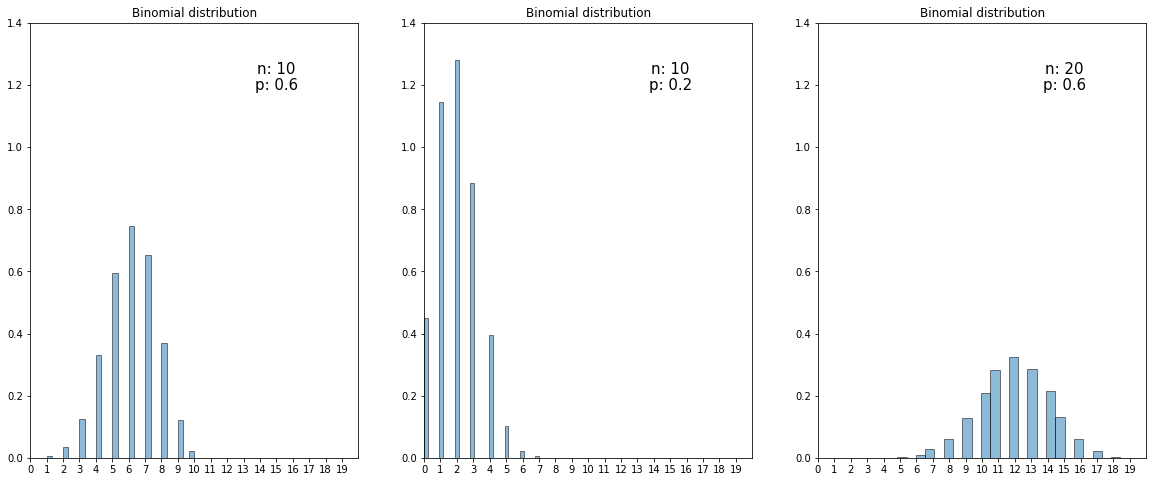

In [6]:
# @hidden_cell

plt.figure(figsize=(20, 8))
plt.subplot(1, 3, 1)
plt.xlim((0,20))
plt.ylim((0,1.4))
plt.xticks(np.arange(20))
count1, bins1, ignored1 = plt.hist(np.random.binomial(10, 0.6, 10000), 30, density=True,alpha=0.5,linewidth=1,edgecolor="black")
plt.title("Binomial distribution")
plt.text(15, 1.25, "n: 10", ha="center", va="center",size=15)
plt.text(15, 1.2, "p: 0.6", ha="center", va="center",size=15)
plt.subplot(1, 3, 2)
plt.xlim((0,20))
plt.ylim((0,1.4))
plt.xticks(np.arange(20))
count2, bins2, ignored2 = plt.hist(np.random.binomial(10, 0.2, 10000), 30, density=True,alpha=0.5,linewidth=1,edgecolor="black")
plt.title("Binomial distribution")
plt.text(15, 1.25, "n: 10", ha="center", va="center",size=15)
plt.text(15, 1.2, "p: 0.2", ha="center", va="center",size=15)
plt.subplot(1, 3, 3)
plt.xlim((0,20))
plt.ylim((0,1.4))
plt.xticks(np.arange(20))
count3, bins3, ignored3 = plt.hist(np.random.binomial(20, 0.6, 10000), 30, density=True,alpha=0.5,linewidth=1,edgecolor="black")
plt.title("Binomial distribution")
plt.text(15, 1.25, "n: 20", ha="center", va="center",size=15)
plt.text(15, 1.2, "p: 0.6", ha="center", va="center",size=15)

***

#### Exercise 3

A. Adam is at level 100 in Candy Crush, an easy level with probability of success *p* = 0.6. He plays 25 gamerounds on this level during his lunch break

B. Becca is a very engaged player, she already reached level 1300, which has a probability of success *p* = 0.1. She plays 160 gamerounds on her Friday night off.

Given that both players only play their respective levels (that is, they don't progress to the next level), who do you expect to have more successes? Adam or Becca?

In [126]:
adam = np.random.binomial(25
                   , 0.6 # probability of success 
                   , 1 # number of experiments
                  )
print(adam)
print(0.6*25)

[10]
15.0


In [116]:
becca = np.random.binomial(160
                   , 0.1 # probability of success 
                   , 1 # number of experiments
                  )
print(becca)
print(160*0.1)

[17]
16.0


I would expact Becca to have more successes then Adam however this cannot be guarenteed 

***

We already touched briefly upon how to simulate data from the binomial distribution in exercise 1. Because the binomial distribution represents a sequence of independent Bernoulli experiments, we can just simulate a bunch of Bernoulli experiments and count the number of successes. 

***

#### Exercise 4

We've used the function below in exercise 1, when we simulated Bernoulli experiments. The first parameter, that we didn't discuss yet, is in fact the parameter *n* from the binomial distribution. Remember, when you set *n* = 1 you are simulating from the Bernoulli distribution, and when you set *n* > 1 you are simulating from the binomial distribution. 

Play around with the function parameters to see how the output changes. Can you simulate data from 100 players, each playing 10 gamerounds on a level with probability of success *p* = 0.4?

In [143]:
np.random.binomial(5 # number of trials
                   , 0.6 # probability of success 
                   , 5) # number of experiments

array([3, 3, 4, 3, 2])

***

### Pass rate

So far we've learned three important concepts in game analysis that you can use to similute game play in your own game.
* The Bernoulli distribution, which gives you the outcome (success or failure) of a single gameround.
* The binomial distribution, which gives you the number of successes out of *n* gamerounds.
* How to simulate data from the Bernoulli or binomial distribution, and how it's all based on random numbers between 0 and 1.

The final piece of the puzzle is the passrate, which is the empirical value of the probability of success *p* that we discussed earlier. 

***

#### Exercise 5

1. Given a dataset containing 500 gamerounds on a level, of which 90 have been successful, can you compute the passrate?

In [168]:
90/500

0.18

2. If another 100 gamerounds will be played on this level in the next hour, how many of those do we expect to be successful gamerounds?

In [198]:
np.random.binomial(1 # number of trials
                   , 0.18 # probability of success 
                   , 100) # number of experiments
0.18*100

18.0

***